In [1]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

In [2]:
# car_front = pd.read_csv('./Documents/data_set/Result/67_Ford_Black_front/80_overall.csv')
# car_side = pd.read_csv('./Documents/data_set/Result/99_Fiesta_Purple_side/80_overall.csv')
# car_back = pd.read_csv('./Documents/data_set/Result/26_Ford_Black_back/80_overall.csv')
# pillar = pd.read_csv('./Documents/data_set/Result/Pillar/80_overall.csv')
# human_A = pd.read_csv('./Documents/data_set/Result/Human_A/80_overall.csv')
# human_B = pd.read_csv('./Documents/data_set/Result/Human_B/80_overall.csv')

# car_front_fft = fft_from_data_frame(car_front)
# car_side_fft = fft_from_data_frame(car_side)
# car_back_fft = fft_from_data_frame(car_back)
# pillar_fft = fft_from_data_frame(pillar)
# human_A_fft = fft_from_data_frame(human_A)
# human_B_fft = fft_from_data_frame(human_B)

In [3]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('./Documents/data_set/Result/67_Ford_Black_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('./Documents/data_set/Result/92_CBR_Honda_side/*_overall.csv')
cycle_1 = glob.glob('./Documents/data_set/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('./Documents/data_set/Result/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
pillar_1 = glob.glob('./Documents/data_set/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result/Pillar_2/*_overall.csv')
stopper_1 = glob.glob('./Documents/data_set/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result/Stopper_2/*_overall.csv')
# ventilator_1 = glob.glob('./Documents/data_set/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('./Documents/data_set/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result/Wall_2/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
# ventilator_1_fft = get_fft_set(ventilator_1)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)

In [5]:
car = car_front_1_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft
pillar = pillar_1_fft + pillar_2_fft
stopper = stopper_1_fft + stopper_2_fft
# ventilator = ventilator_1_fft
wall = wall_1_fft + wall_1_fft
 
X = car + motorbike + cycle + human + pillar + stopper + wall
y = len(car)*['Car'] + len(motorbike)*['Motorbike'] + len(cycle)*['Cycle'] + len(human)*['Human'] + len(pillar)*['Pillar'] + len(stopper)*['Stopper'] + len(wall)*['Wall']

print(len(car))
print(len(motorbike))
print(len(cycle))
print(len(human))
print(len(pillar))
print(len(stopper))
# print(len(ventilator))
print(len(wall))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

11053
1268
445
1431
7816
2690
3774


In [6]:
print('X train data : ', np.array(X_train).shape)
print('X test data : ', np.array(X_test).shape)
print('y train data : ', np.array(y_train).shape)
print('y test data : ', np.array(y_test).shape)

X train data :  (17086, 90)
X test data :  (11391, 90)
y train data :  (17086,)
y test data :  (11391,)


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

from sklearn.model_selection import cross_val_score

for i in range(13,50):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i), random_state=12)
    scores = cross_val_score(clf, normalized_X_train, y_train, cv=4, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

hidden layer 13 score average 0.7359843027743422
hidden layer 14 score average 0.7497909704497012
hidden layer 15 score average 0.7653630415142665
hidden layer 16 score average 0.7608571198326448
hidden layer 17 score average 0.7369194263172206
hidden layer 18 score average 0.7245728407406433
hidden layer 19 score average 0.7314145429308212
hidden layer 20 score average 0.7779482321571104
hidden layer 21 score average 0.7595708452841442
hidden layer 22 score average 0.7828642091852398
hidden layer 23 score average 0.7341105197835259
hidden layer 24 score average 0.7964416186441421
hidden layer 25 score average 0.7422480626529485
hidden layer 26 score average 0.7692267441605487
hidden layer 27 score average 0.794159589374523
hidden layer 28 score average 0.7922876428615285
hidden layer 29 score average 0.7510842619880886
hidden layer 30 score average 0.7634340819584419
hidden layer 31 score average 0.8189162697681762
hidden layer 32 score average 0.7721472646896297
hidden layer 33 score

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(31,), random_state=12,activation="relu")
clf.fit(normalized_X_train,y_train)
result = clf.predict(normalized_X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(result, y_test))
print(accuracy_score(result, y_test))

[[3966   15  130  204  284  102   41]
 [   1   54   28    3   12    0    1]
 [  18   82  259   26    3   82    0]
 [  26   16    8  157   54    1    6]
 [ 226   19   44   79 2543   36  210]
 [  60   12   68    2   88  834   18]
 [ 116    3    6   37  144   12 1255]]
0.7960670704942499


[[3998   10  115  151  386  112   35]
 [   2   96   13   16    0    4    1]
 [  29   64  287   17    2   57    0]
 [  22   12    0  220   63    0   16]
 [ 230    9   46   50 2428   57  188]
 [  57    6   82    4   70  819   10]
 [  75    4    0   50  179   18 1281]]
[4807  132  456  333 3008 1048 1607]


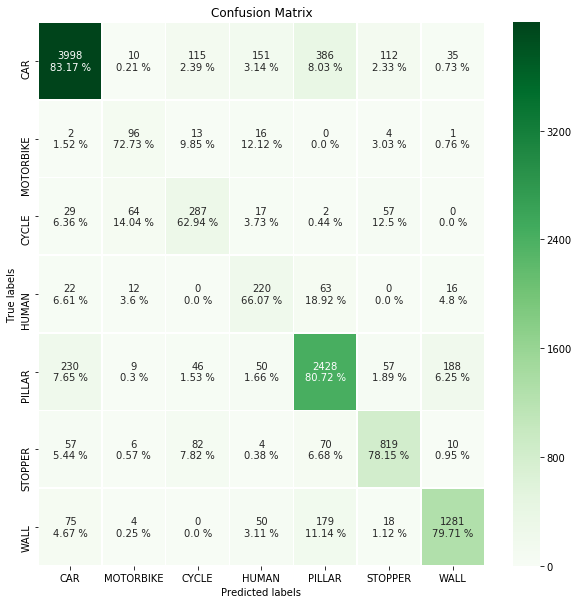

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt  

cm = confusion_matrix(result, y_test)
print(cm)
sum = np.sum(cm, axis=1)
print(sum)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
counter = 0
for i in range(0,7):
    for j in range(0,7):
        percentage = cm[i][j]/sum[i]
        t = ax.texts[counter]
        t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
        counter = counter + 1
ax.xaxis.set_ticklabels(['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']); 
ax.yaxis.set_ticklabels(['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']);
from sklearn.metrics import classification_report
# print(classification_report(y_test, result, ['CAR','MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'VENTILATOR', 'Wall']))


In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# from sklearn.metrics import accuracy_score
accuracy_score(result, y_test)

0.9266087261873409

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(normalized_X_train, y_train)
result = gnb.predict(normalized_X_test)

# from sklearn import metrics
accuracy_score(result, y_test)

0.48187165305943286

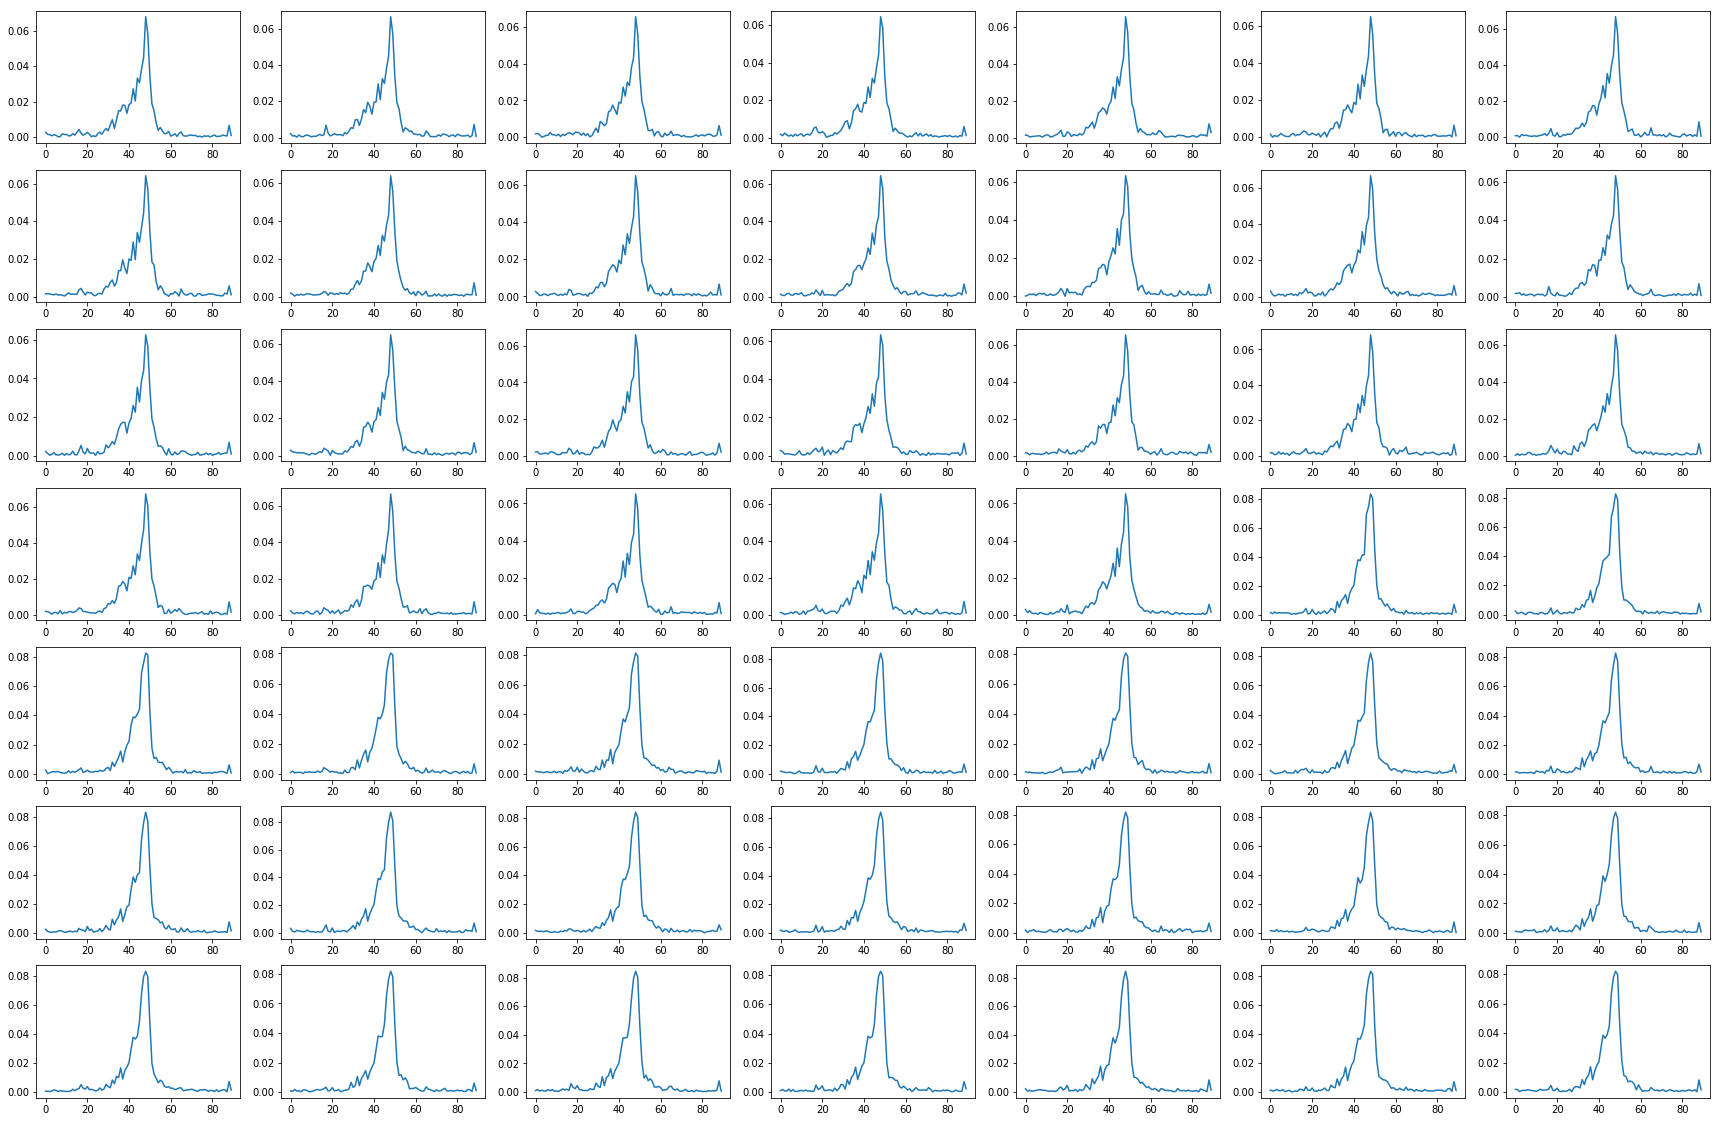

In [23]:
fig = plt.figure(figsize=(30, 20))
for index, data in enumerate(car_front_fft):
    if index < 49:
        ax = fig.add_subplot(7, 7, index+1)
        ax.plot(data)